# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader from Scikit-learn. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Load and display the MNIST data

There is a `sklearn.datasets.fetch_openml` dataloader interface in Scikit-learn. You can load MNIST data like 

```python
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',??) # needs to return X, y, replace '??' with suitable parameters! 
# Convert to [0;1] via scaling (not always needed)
#X = X / 255.
```

but you need to set parameters like `return_X_y` and `cache` if the default values are not suitable! 

Check out the documentation for the `fetch_openml` MNIST loader, try it out by loading a (X,y) MNIST data set, and plot a single digit via the `MNIST_PlotDigit` function here (input data is a 28x28 NMIST subimage)

```python
%matplotlib inline
def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
```

Finally, put the MNIST loader into a single function called `MNIST_GetDataSet()` so you can reuse it later.

#### Qa  Load and display the MNIST data

The function MNIST_GetDataSet() will be implemented by using the fetch_openml function from sklearn.datasets. The parameters of this function will be found by looking at the documentation https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html.

The parameters that is needed to be changed from default values:

name: str -> 

version: int ->

return_X_y: bool ->

cache: bool ->

as_frame: bool -> We are using numpy

c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['5' '0' '4' ... '4' '5' '6']


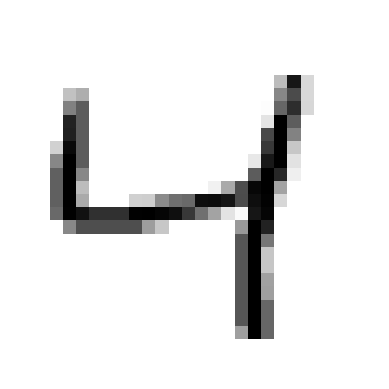

In [5]:
# TODO: add your code here..
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

def MNIST_GetDataSet():
    X, y = fetch_openml(name='mnist_784', version=1, data_home="./data", cache=True, return_X_y = True, as_frame=False)
    X = X/255
    return X,y

def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

X,y = MNIST_GetDataSet()

print(X)
print(y)

# Sejt -- y[2] er 4 og x[2] er også 4 hehe
MNIST_PlotDigit(X[2])

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOML], p.103.

Split your data and run the fit-predict for the classifier using the MNIST data.(We will be looking at cross-validation instead of the simple fit-predict in a later exercise.)

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')
```
instead of the `y`'s you are getting out of the dataloader. In effect, we have now created a binary-classifier, that enable us to classify a particular data sample, $\mathbf{x}(i)$ (that is a 28x28 image), as being a-class-5 or not-a-class-5. 

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

c:\Users\mariu\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X.shape=(70000, 784)
X.shape=(70000, 784)
Correctly classified fives:
Is it a 5?: False


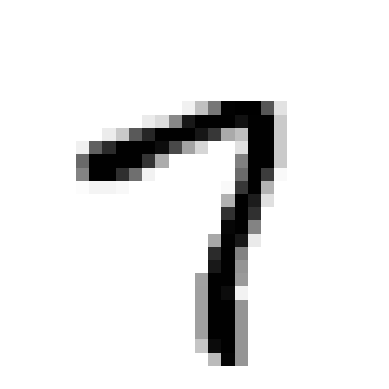

Is it a 5?: False


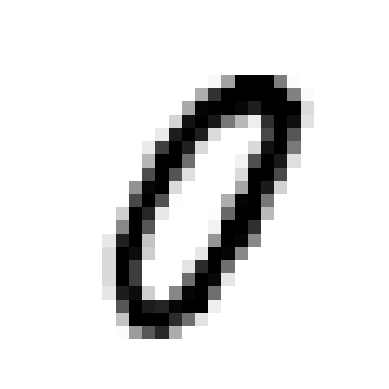

Misclassified fives:
Miscategorized, dumme thomas: True


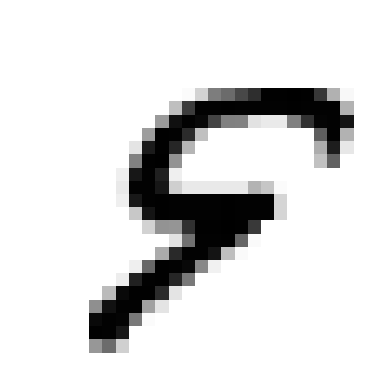

Miscategorized, dumme thomas: True


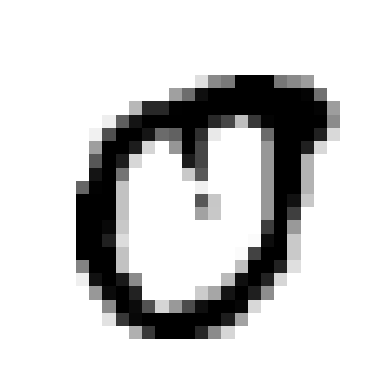

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np

X, y = MNIST_GetDataSet()

print(f"X.shape={X.shape}") # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print(f"X.shape={X.shape}") # X.shape= (70000, 784)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train_5 = (y_train == "5")
y_test_5 = (y_test == "5")

SGD_classifier = SGDClassifier(random_state=42)

SGD_classifier.fit(X_train, y_train_5)

y_pred = SGD_classifier.predict(X_test)

categorized = np.where(y_pred == y_test_5)[0]

not_correctly_categorized = np.where(y_pred != y_test_5)[0]

print("Correctly classified fives:")

for number in categorized[:2]:
    MNIST_PlotDigit(X_test[number])
    predicted_value = SGD_classifier.predict([X_test[number]])
    print(f"Is it a 5?: {predicted_value[0]}")
    plt.show()
    
print("Misclassified fives:")

for number in not_correctly_categorized[:2]:
    MNIST_PlotDigit(X_test[number])
    predicted_value = SGD_classifier.predict([X_test[number]])
    print(f"Miscategorized: {predicted_value[0]}")
    plt.show()
    

#### Qc Implement a dummy binary classifier

Now we will try to create a Scikit-learn compatible estimator implemented via a python class. Follow the code found in [HOML], p.107 (for [HOML] 1st and 2nd editions: name you estimator `DummyClassifier` instead of `Never5Classifyer`).

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="https://itundervisning.ase.au.dk/SWMAL/L02/Figs/class_base_estimator.png" alt="WARNING: could not get image from server." style="width:500px">

All Scikit-learn classifiers inherit from `BaseEstimator` (and possibly also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duck typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and find a way to extract the accuracy `score` from the test data. You may implement an accuracy function yourself or just use the `sklearn.metrics.accuracy_score` function. 

Finally, compare the accuracy score from your `DummyClassifier` with the scores found in [HOML] "Measuring Accuracy Using Cross-Validation", p.107. Are they comparable? 

In [11]:
from sklearn.metrics import accuracy_score

class DummyClassifier():
    def fit(self, X, y=None):
        pass # Dummy classifier doesn't fit
    
    def predict(self, X):
        return [0] * len(X) # Writes 0 in every index
    
def calculate_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)
    

dummyClassifier = DummyClassifier()

dummyClassifier.fit(X_train)

y_pred = dummyClassifier.predict(X_test)

accuracy = calculate_accuracy(y_test_5, y_pred)

print(accuracy) # The accuracy will be around 90%, this is a fake accuracy


0.9083571428571429


### Qd Conclusion

Now, conclude on all the exercise above. 

Write a short textual conclusion (max. 10- to 20-lines) that extract the _essence_ of the exercises: why did you think it was important to look at these particular ML concepts, and what was our overall learning outcome of the exercises (in broad terms).

In [ ]:
# TODO: Qd concluding remarks in text..

REVISIONS||
:- | :- |
2018-12-19| CEF, initial.                  
2018-02-06| CEF, updated and spell checked. 
2018-02-08| CEF, minor text update.
2018-03-05| CEF, updated with SHN comments.
2019-09-02| CEF, updated for ITMAL v2.
2019-09-04| CEF, updated and added conclusion Q.
2020-01-25| CEF, F20 ITMAL update.
2020-02-04| CEF, updated page numbers to HOMLv2.
2020-09-03| CEF, E20 ITMAL update, udpated figs paths.
2020-09-06| CEF, added alt text.
2020-09-18| CEF, added binary-classifier text to Qb to emphasise 5/non-5 classification.
2021-01-12| CEF, F21 ITMAL update, moved revision tabel.
2021-08-02| CEF, update to E21 ITMAL.
2022-01-25| CEF, update to F22 SWMAL.
2023-02-07| CEF, update HOML page numbers.
